Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# DOMAĆI ZADATAK - zadatak 3
## april 2021. 

# Pavle Šarenac 2020/0359

# __Zadatak__: SIRV model
SIRV model epidemije uključuje mogućnost kontinualne vakcinacije određenog broja podložnih jedinki $v = v(t)$ tokom epidemije. Sistem diferencijalnih jednačina prvog reda koji opisuje kompartmane populacije se u tom slučaju izražava na sledeći način:

\begin{equation}
    \frac{dS}{dt} = -\alpha S I - v\\
    \frac{dI}{dt} = \alpha S I - \beta I\\
    \frac{dR}{dt} = \beta I + v
\end{equation}

gde je $S$ broj jedinki podložnih oboljevanju, $I$ broj zaraženih jedinki, $R$ broj uklonjenih jedinki, $\alpha$ konstanta brzine infekcije i $\beta$ konstanta brzine oporavka.  

Na početku epidemije jedna jedinka zaražena virusom influence (gripa) ulazi u izolovanu podložnu populaciju od $1000$ jedinki. Evolucija epidemije i proces kontinualne vakcinacije počinju u istom trenutku. Konstante brzine koje definišu širenje virusa su $\alpha = 0.002$, $\beta = 1$ i definišu se na nedeljnom (sedmičnom) nivou. 

Navedena populacija nalazi se unutar zemlje u razvoju koja nije u mogućnosti da finansira pun kapacitet kontinualne vakcinacije. Stoga povremeno dolazi do nestašice vakcina, pa se broj vakcinisanih podložnih jedinki menja u vremenu prema zavisnosti $v(t)$ prikazanoj na slici uz zadatak. Zavisnost $v(t)$ se sastoji od niza pozitivnih poluperioda harmonijske sinusne funkcije koja je opisana amplitudom $v = 50$ i frekvencijom $f = 0.25$/nedelja.

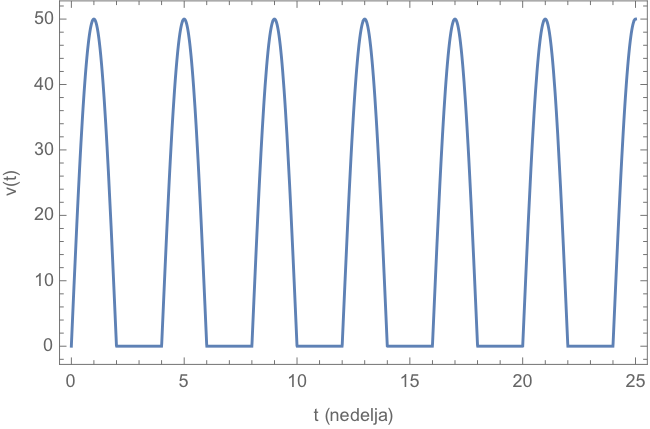

a)	Sastaviti matematički izraz (ili segment programskog koda u formi Python definicije) koji definiše i iscrtava zavisnost $v(t)$ na intervalu od $0$ do $25$ nedelja i reprodukovati sliku pridruženu uz zadatak.

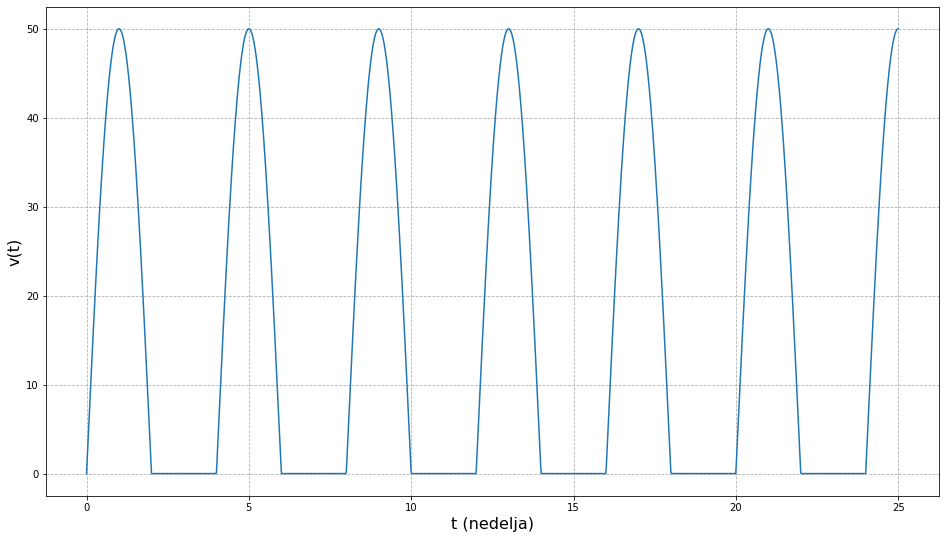

In [4]:
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(0, 25, 2000)
def v(t):
    return np.maximum(50 * np.sin(2 * np.pi * 0.25 * t), 0) # x(t) = A * sin(2 * pi * f * t)
# posto je frekvencija ocilovanja (broj punih oscilacija tokom jedne jedinice vremena - ovde je to jedna nedelja) f = 0.25, 
# odatle znamo da je period oscilovanja T = 1/f = 4 nedelje
# sa grafika vidimo da u svakoj periodi:
# u prvoj nedelji broj vakcinisanih raste dok ne dostigne maksimum od 50 vakcinisanih
# u drugoj nedelji broj vakcinisanih opada dok ne opadne na 0 vakcinisanih
# treca i cetvrta nedelja su obelezene nestasicom vakcina i tu nasa funkcija treba da bude nula
# zato nama treba za prvu polovinu svake periode data sinusna funkcija, dok za drugu polovinu periode uzimamo da je nasa f-ja 0
# jer bi tada sinusna funkcija postala negativna, a to nam nema smisla da imamo negativan broj vakcinisanih

plt.figure(figsize=(16, 9))
plt.plot(t, v(t))
plt.grid(linestyle="--")
plt.xlabel("t (nedelja)", size=16)
plt.ylabel("v(t)", size=16)
plt.show()

b)	Napisati Python definiciju koja opisuje sistem diferencijalnih jednačina SIRV modela u kome je dinamika vakcinacije definisana izrazom (ili Python definicijom) iz tačke a). Definiciji koja opisuje sistem diferencijalnih jednačina zadati $\alpha$, $\beta$ i $v$ kao kao argumente. 

In [5]:
def SIRV(values, t, alpha, beta, v):
    S, I, R = values
    dSdt = -alpha * S * I - v(t)
    dIdt = alpha * S * I - beta * I
    dRdt = beta * I + v(t)
    return [dSdt, dIdt, dRdt]

c)	Rešiti sistem diferencijalnih jednačina na domenu od $0$ do $25$ nedelja sa početnim uslovima koji su naznačeni u opisu početka epidemije. Nacrtati zavisnosti $S(t)$, $I(t)$ i $R(t)$ na istom grafiku. Krive zavisnosti obeležiti različitim tipovima linija, različitim bojama i odgovarajućom legendom. Tipove linija, kao i njihove boje birati po sopstvenom nahođenju. Obeležiti $x$ i $y$ ose grafika, i dodati naslov u kome je potrebno da budu napisane vrednosti parametara $\alpha$ i $\beta$.

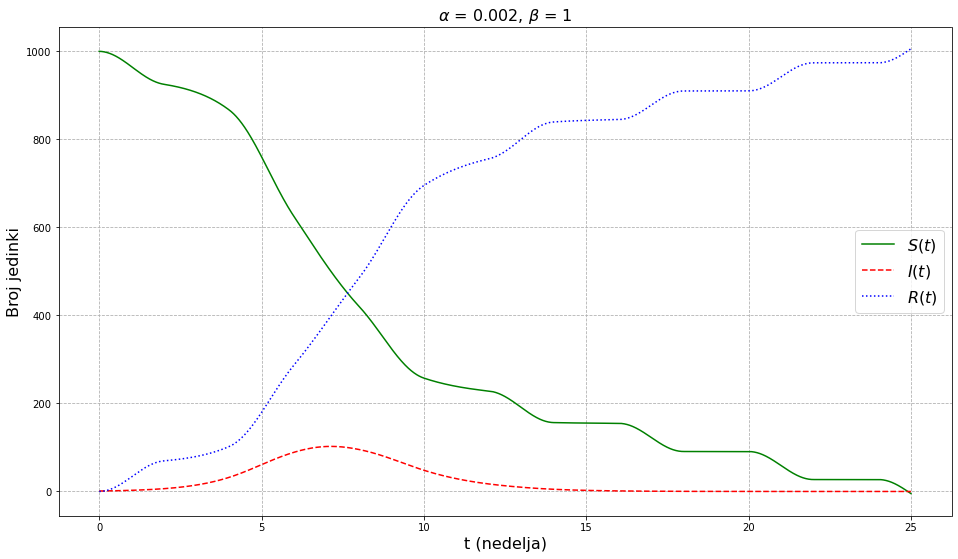

In [6]:
from scipy import integrate

S, I, R = 1000, 1, 0
# na pocetku ima 1000 podloznih, 1 zarazena(da bi mogla da se prosiri epidemija) i 0 uklonjenih jedinki(mrtvih ili imunizovanih)
values = [S, I, R]
alpha, beta = 0.002, 1

sol = integrate.odeint(SIRV, values, t, args=(alpha, beta, v))
# v je zapravo definicija funkcije v(t) - to prosledjujem kao argument
# sol ce biti matrica od 2000 vrsta i tri kolone, u svakoj vrsti su vrednosti S(t), I(t) i R(t) za dati trenutak

plt.figure(figsize=(16, 9))
plt.title("$\\alpha$ = 0.002, $\\beta$ = 1", size=16)
plt.plot(t, sol[:, 0], color="green", label="$S(t)$")
plt.plot(t, sol[:, 1], color="red", linestyle="dashed", label="$I(t)$")
plt.plot(t, sol[:, 2], color="blue", linestyle="dotted", label="$R(t)$")
plt.xlabel("t (nedelja)", size=16)
plt.ylabel("Broj jedinki", size=16)
plt.grid(linestyle="--")
plt.legend(prop={'size': 16})
plt.show()

d) Koliko nedelja je potrebno da epidemija dostigne svoj maksimum? Napraviti definiciju koja traži sve maksimume proizvoljnog niza, a zatim iz svih lokalnih maksimuma izdvojiti globalni maksimum i vremenski trenutak u kome se dostiže. 

In [11]:
def findLocalMax(array):
    allMax = []
    for i in range(1, len(array) - 1):
        if array[i - 1] < array[i] > array[i + 1]:
            allMax.append(array[i])
    return allMax

globalMax = max(findLocalMax(sol[:, 1])) # globalMax = 102.4036907201437
time = t[np.where(sol[:, 1] == globalMax)] # time[0] = 7.141070535267634

print(globalMax)
print(time)

102.4036907201437
[7.14107054]


Epidemija dostiže svoj maksimum posle 7.141070535267634 nedelja.

e) Koliko iznosi maksimalni broj zaraženih jedinki za date parametre? (Iskoristiti funkciju iz prethodnog pitanja). Komentarisati uticaj dinamike vakcinacije na trendove krivih $S(t)$, $I(t)$ i $R(t)$. 

Za date parametre, maksimalni broj zaraženih jedinki iznosi 102.4036907201437. <br>
Sa početnog grafika vidi se da vakcina nestane počevši od druge nedelje svake četvrte nedelje, i ta nestašica uvek traje dve nedelje. Na grafiku pod c) možemo uzeti neki interval da vidimo kakav uticaj ima nestašica vakcina na naše tri funkcije koje nam modeluju epidemiju. <br>
<br>
ima vakcina (0 - 2 nedelje): <br>
- pošto vakcina ima, broj uklonjenih jedinki raste (R(t)), dok broj podložnih jedinki opada (S(t)) <br>

nema vakcina (2 - 4 nedelje): <br>
- vidi se da broj uklonjenih jedinki (R(t)) u ovom periodu sporije raste;
- broj podložnih jedinki (S(t)) u ovom periodu sporije opada
- broj zaraženih jedinki (I(t)) kreće da raste

Na intervalu 0 - 4 nedelje vidimo kakav uticaj dinamike vakcinacije na trendove krivih S(t), I(t) i R(t) se uglavnom može uočiti na grafiku pod c). Još neki intervali na kojima se jasno vidi objašnjeni uticaj pogotovo na krive S(t) i R(t) su na primer: 8 - 12 nedelja, 12 - 16 nedelja, itd.

f) Odrediti u kom trenutku je bezbedno prestati sa vakcinacijom jedinki u podložnoj populaciji i obrazložiti odgovor.

Bilo bi bezbedno prestati sa vakcinacijom jedinki u podložnoj populaciji nakon 15. nedelje epidemije zato što se jasno vidi na grafiku pod c) da se tada broj zaraženih smanjio na 0, što znači da više nema opasnosti od širenja bolesti.

g) Ponoviti tačku c), odnosno reprodukovati grafik iz tačke c) rešavanjem sistema jednačina pomoću FDM (metoda konačnih razlika) metode umesto ugrađenim metodama kao u tački c). Na istoj slici prikazati zavisnosti $S(t)$, $I(t)$ i $R(t)$ dobijene rešavanjem pomoću ugrađenih metoda, kao i iste te zavisnosti dobijene rešavanjem pomoću FDM metode. Linije dobijene preko ugrađenih metoda prikazati kao isprekidane linije proizvoljnih boja, a linije dobijene rešavanjem pomoću FDM metode prikazati kao pune linije istih proizvoljno izabranih boja. Uneti legendu oznaka, kao i obeležja osa. 

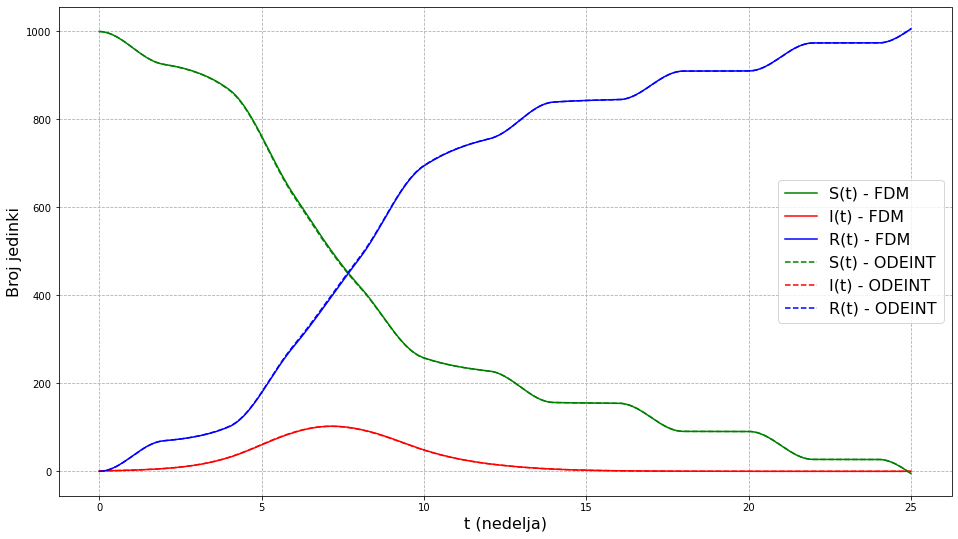

In [12]:
solFdm = np.zeros([len(t), 3]) # ovde sam rekao np.zeros([2000, 3]) sto znaci matrica sa 2000 vrsta i 3 kolone
solFdm[0] = np.array([S, I, R]) # prvu vrstu matrice popunjavam pocetnim uslovima S = 1000, I = 1, R = 0
# metod konacnih razlika
# radim rucno priblizno ono sto metoda integrate.odeint radi automatski
# resavam paralelno integral od dS/dt, dI/dt i dR/dt, tj trazim S(t), I(t) i R(t) tako sto svaku sledecu vrednost ovih funkcija
# nalazim kao zbir prosle vrednosti i naredne vrednosti diferencijala
# npr S(t = t[1]) = S(t = t[0]) + dS/dt * (t[1] - t[0]); <-- isto se primenjuje za I(t) i R(t)
for i in range(1, len(t)):
    solFdm[i] = solFdm[i - 1] + np.array(SIRV(solFdm[i - 1], t[i], alpha, beta, v)) * (t[i] - t[i - 1])
    
plt.figure(figsize=(16, 9))
plt.plot(t, solFdm[:, 0],  color="green", label="S(t) - FDM")
plt.plot(t, solFdm[:, 1], color="red", label="I(t) - FDM")
plt.plot(t, solFdm[:, 2], color="blue", label="R(t) - FDM")
plt.plot(t, sol[:, 0], color="green", linestyle="--", label="S(t) - ODEINT")
plt.plot(t, sol[:, 1], color="red", linestyle="--", label="I(t) - ODEINT")
plt.plot(t, sol[:, 2], color="blue", linestyle="--", label="R(t) - ODEINT")
plt.xlabel("t (nedelja)", size=16)
plt.ylabel("Broj jedinki", size=16)
plt.grid(linestyle="--")
plt.legend(prop={'size': 16})
plt.show()